# music21: A Toolkit for Comupter-Aided Musicology

## Some examples to test basic music21 corpus functionalities

This is a Jupyter notebook created by [@musicenfanthen](https://github.com/musicEnfanthen) and [@aWilsonandmore](https://github.com/aWilsonandmore) to work with some basic functionalities of music21 (http://web.mit.edu/music21/). For more information on Jupyter notebooks go to http://jupyter.org/. 

To execute a block of code in this notebook, click in the cell and press `Shift+Enter`.

To get help on any music21 routine, click on it and press `Shift+Tab`.

### Imports and setup

To use music21 in this notebook and python, you have to import all (\*) routines  from music21 at first with the following command.

You’ll probably get a few warnings that you’re missing some optional modules. That’s okay. If you get a warning that “no module named music21” then something probably went wrong above.

In [1]:
%matplotlib inline     
# imports the matplot library to plot graphs etc.

from music21 import *

Probably you have to set manually the correct file path to an Application that is able to open MusicXML files (like MuseScore). To do so, you can use the `music21.environment` module where you can set an `musicxmlPath` key.

Make sure to change below the string `path/to/your/musicXmlApplication` with the correct file path (keep the quotation marks):
- on Mac e.g.: `/Applications/MuseScore 2.app/Contents/MacOS/mscore` 
- or on Windows e.g.: `C:/Program Files (x86)/MuseScore 2/bin/MuseScore.exe`

and uncomment the line (remove the `#` at the begin of the line).

In the same way, you can also add a path to your lilypond installation, using
`env['lilypondPath']`:
- on Mac e.g.: `Applications/Lilypond.app`
- on Windows e.g.: `C:/Program Files (x86)/LilyPond/usr/bin/lilypond.exe`

In [2]:
env = environment.Environment()
# env['musicxmlPath'] = 'path/to/your/musicXmlApplication'
# env['lilypondPath'] = 'path/to/your/lilypond'
env['musescoreDirectPNGPath'] = 'C:/Program Files (x86)/MuseScore 2/bin/MuseScore.exe'

print('Environment settings:')
print('lilypond: ', env['lilypondPath'])
print('musicXML: ', env['musicxmlPath'])
print('musescore: ', env['musescoreDirectPNGPath'])

Environment settings:
lilypond:  C:\Program Files (x86)\LilyPond\usr\bin\lilypond.exe
musicXML:  C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe
musescore:  C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe


## Starting with corpus examples

List of works found in the music21 corpus: http://web.mit.edu/music21/doc/about/referenceCorpus.html#demonstration-files

music21's corpus module: http://web.mit.edu/music21/doc/moduleReference/moduleCorpus.html

In [3]:
demoPaths = corpus.getComposer('demos')
demoPaths

['c:\\python\\lib\\site-packages\\music21\\corpus\\demos\\ComprehensiveChordSymbolsTestFile.mxl',
 'c:\\python\\lib\\site-packages\\music21\\corpus\\demos\\chorale_with_parallels.mxl',
 'c:\\python\\lib\\site-packages\\music21\\corpus\\demos\\chord_realization_exercise.mxl',
 'c:\\python\\lib\\site-packages\\music21\\corpus\\demos\\incorrect_time_signature_pv.mxl',
 'c:\\python\\lib\\site-packages\\music21\\corpus\\demos\\layoutTest.xml',
 'c:\\python\\lib\\site-packages\\music21\\corpus\\demos\\layoutTestMore.xml',
 'c:\\python\\lib\\site-packages\\music21\\corpus\\demos\\multiple-verses.xml',
 'c:\\python\\lib\\site-packages\\music21\\corpus\\demos\\nested_tuplet_finale_test.xml',
 'c:\\python\\lib\\site-packages\\music21\\corpus\\demos\\nested_tuplet_finale_test2.xml',
 'c:\\python\\lib\\site-packages\\music21\\corpus\\demos\\two-parts.xml',
 'c:\\python\\lib\\site-packages\\music21\\corpus\\demos\\two-voices.xml',
 'c:\\python\\lib\\site-packages\\music21\\corpus\\demos\\voices_wit

demos/ComprehensiveChordSymbolsTestFile.mxl


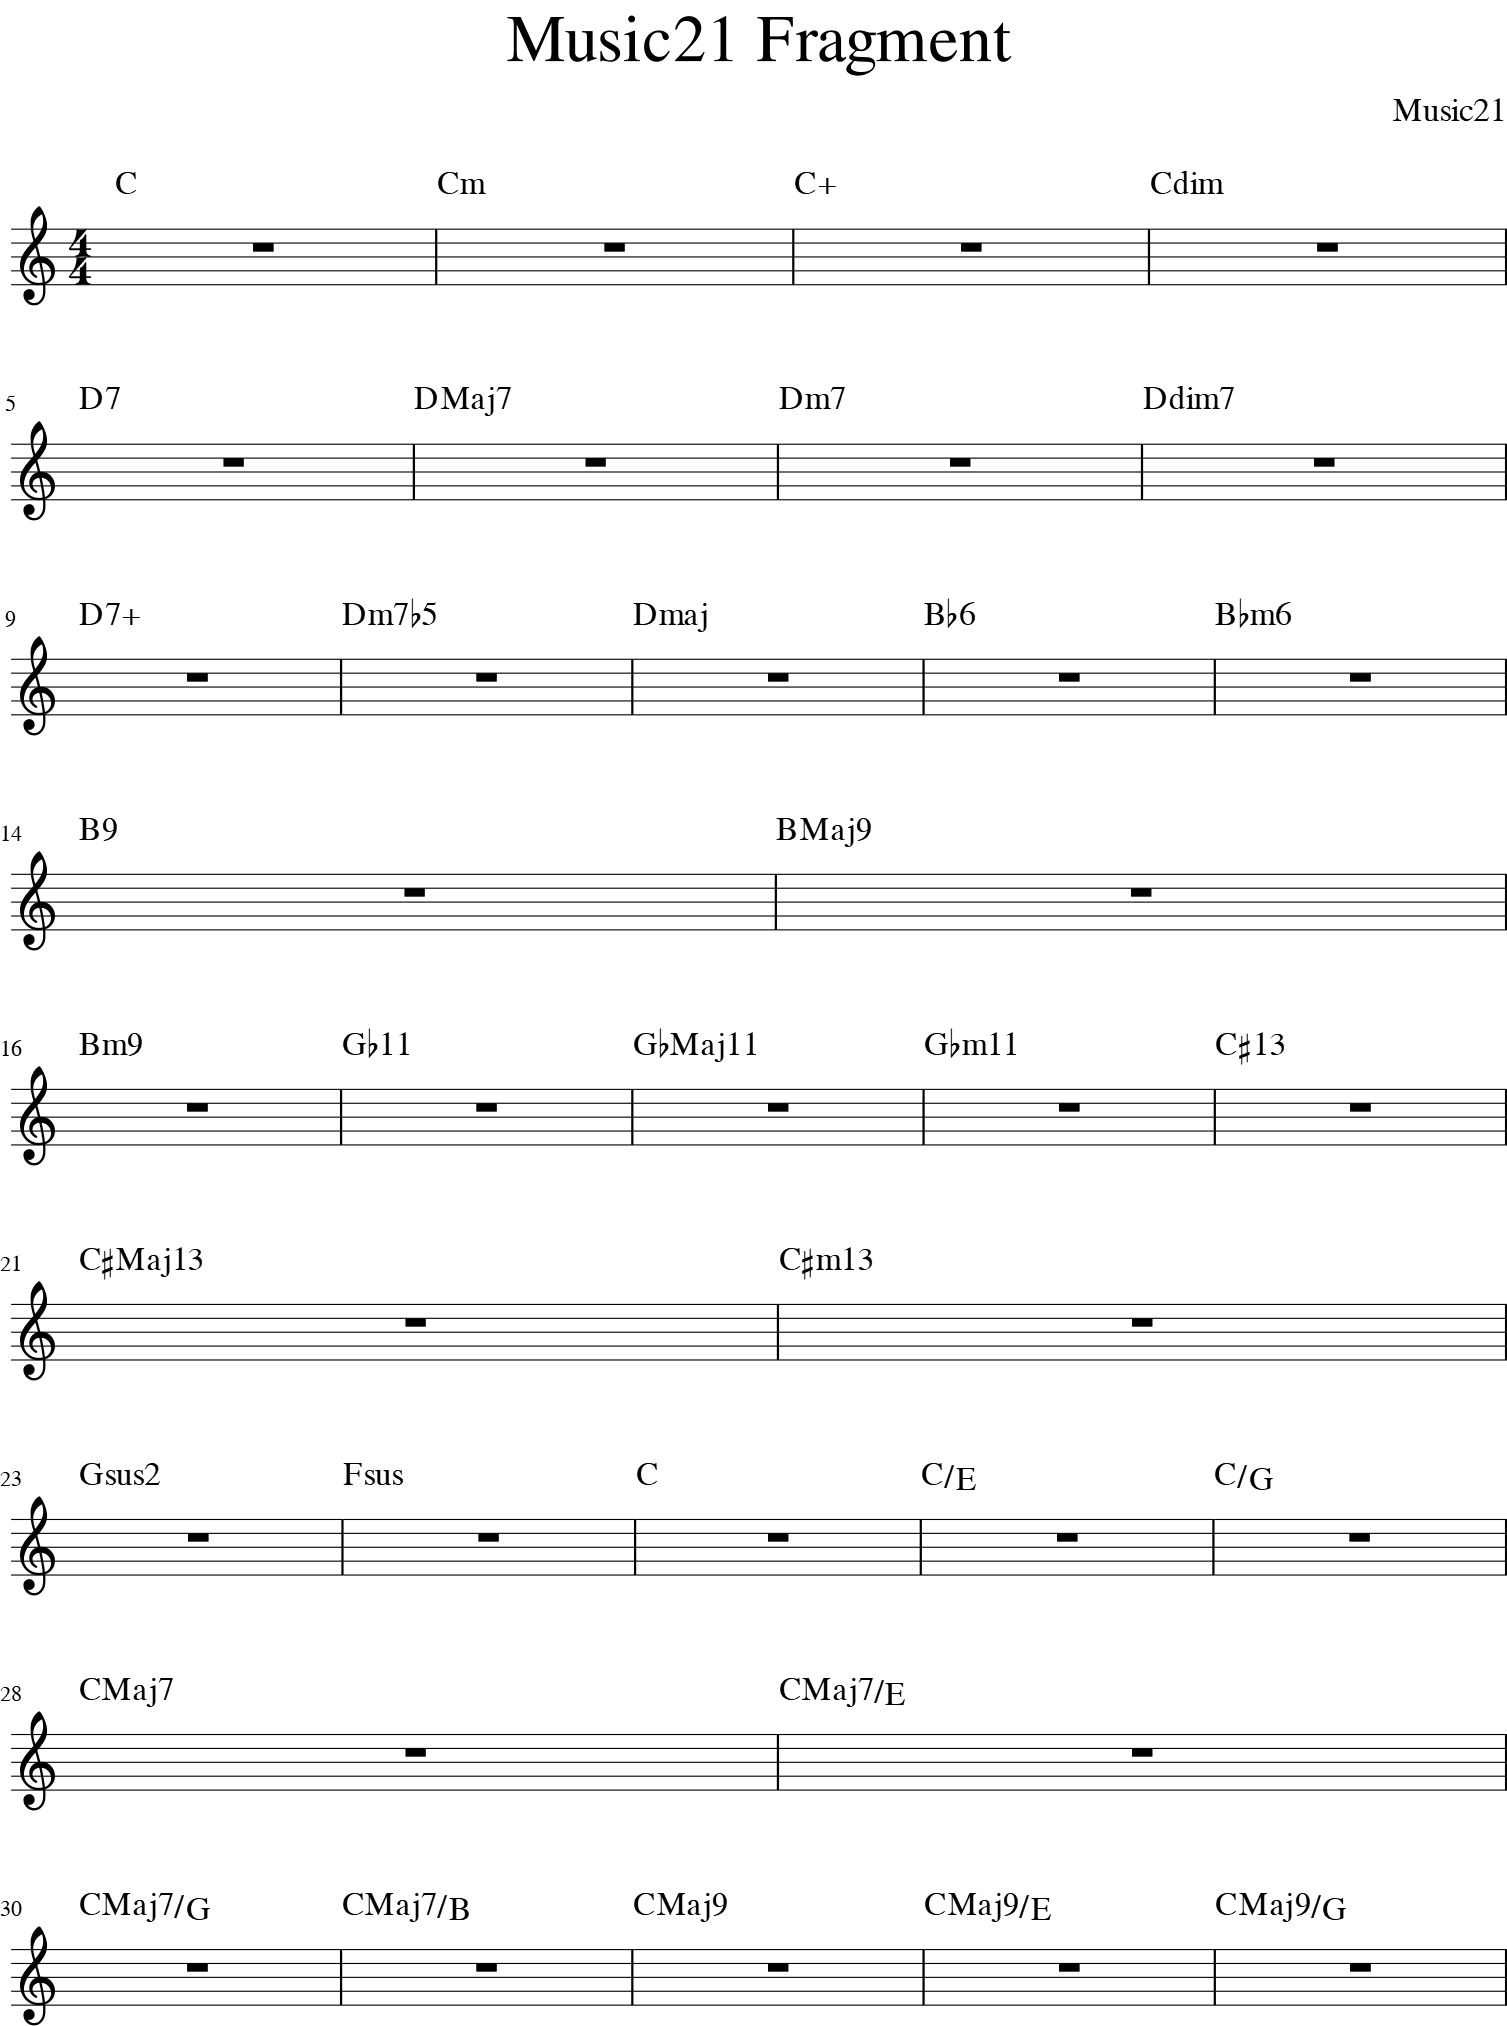

In [4]:
demoPath = demoPaths[0]

demo = corpus.parse(demoPath)

print(demo.corpusFilepath)
demo.show()

There is a bunch of metadata bundles in the music21 corpus. You can make use of it via the corpus search:

In [5]:
sbBundle = corpus.search('Bach', 'composer')
print(sbBundle)
print(sbBundle[0])
print(sbBundle[0].sourcePath)
sbBundle[0].metadata.all()

<music21.metadata.bundles.MetadataBundle {25 entries}>
<music21.metadata.bundles.MetadataEntry: bach_bwv277_krn>
bach/bwv277.krn


[('composer', 'Bach, Johann Sebastian'),
 ('copyright',
  'Copyright 1994, Center for Computer Assisted Research in the Humanities'),
 ('countryOfComposition', 'Deutschland'),
 ('electronic editor', 'W.B. Hewlett'),
 ('electronic encoder', 'S. Rasmussen'),
 ('movementNumber', '1'),
 ('number', ''),
 ('parentTitle', 'Four-part Chorales'),
 ('title', '25. Christ lag in Todesbanden')]

### Loading files & formats from corpus or disk

It is also possible to load and parse various file formats directly into music21. 

"In general, to load a file from disk, call music21.converter.parse(), which can handle importing all supported formats. (For complete documentation on file and data formats, see http://web.mit.edu/music21/doc/moduleReference/moduleConverter.html#moduleconverter" (UsersGuide 08).

The following example takes a musicXML-File as input. A list of possible file formats can be found here: http://web.mit.edu/music21/doc/usersGuide/usersGuide_08_installingMusicXML.html

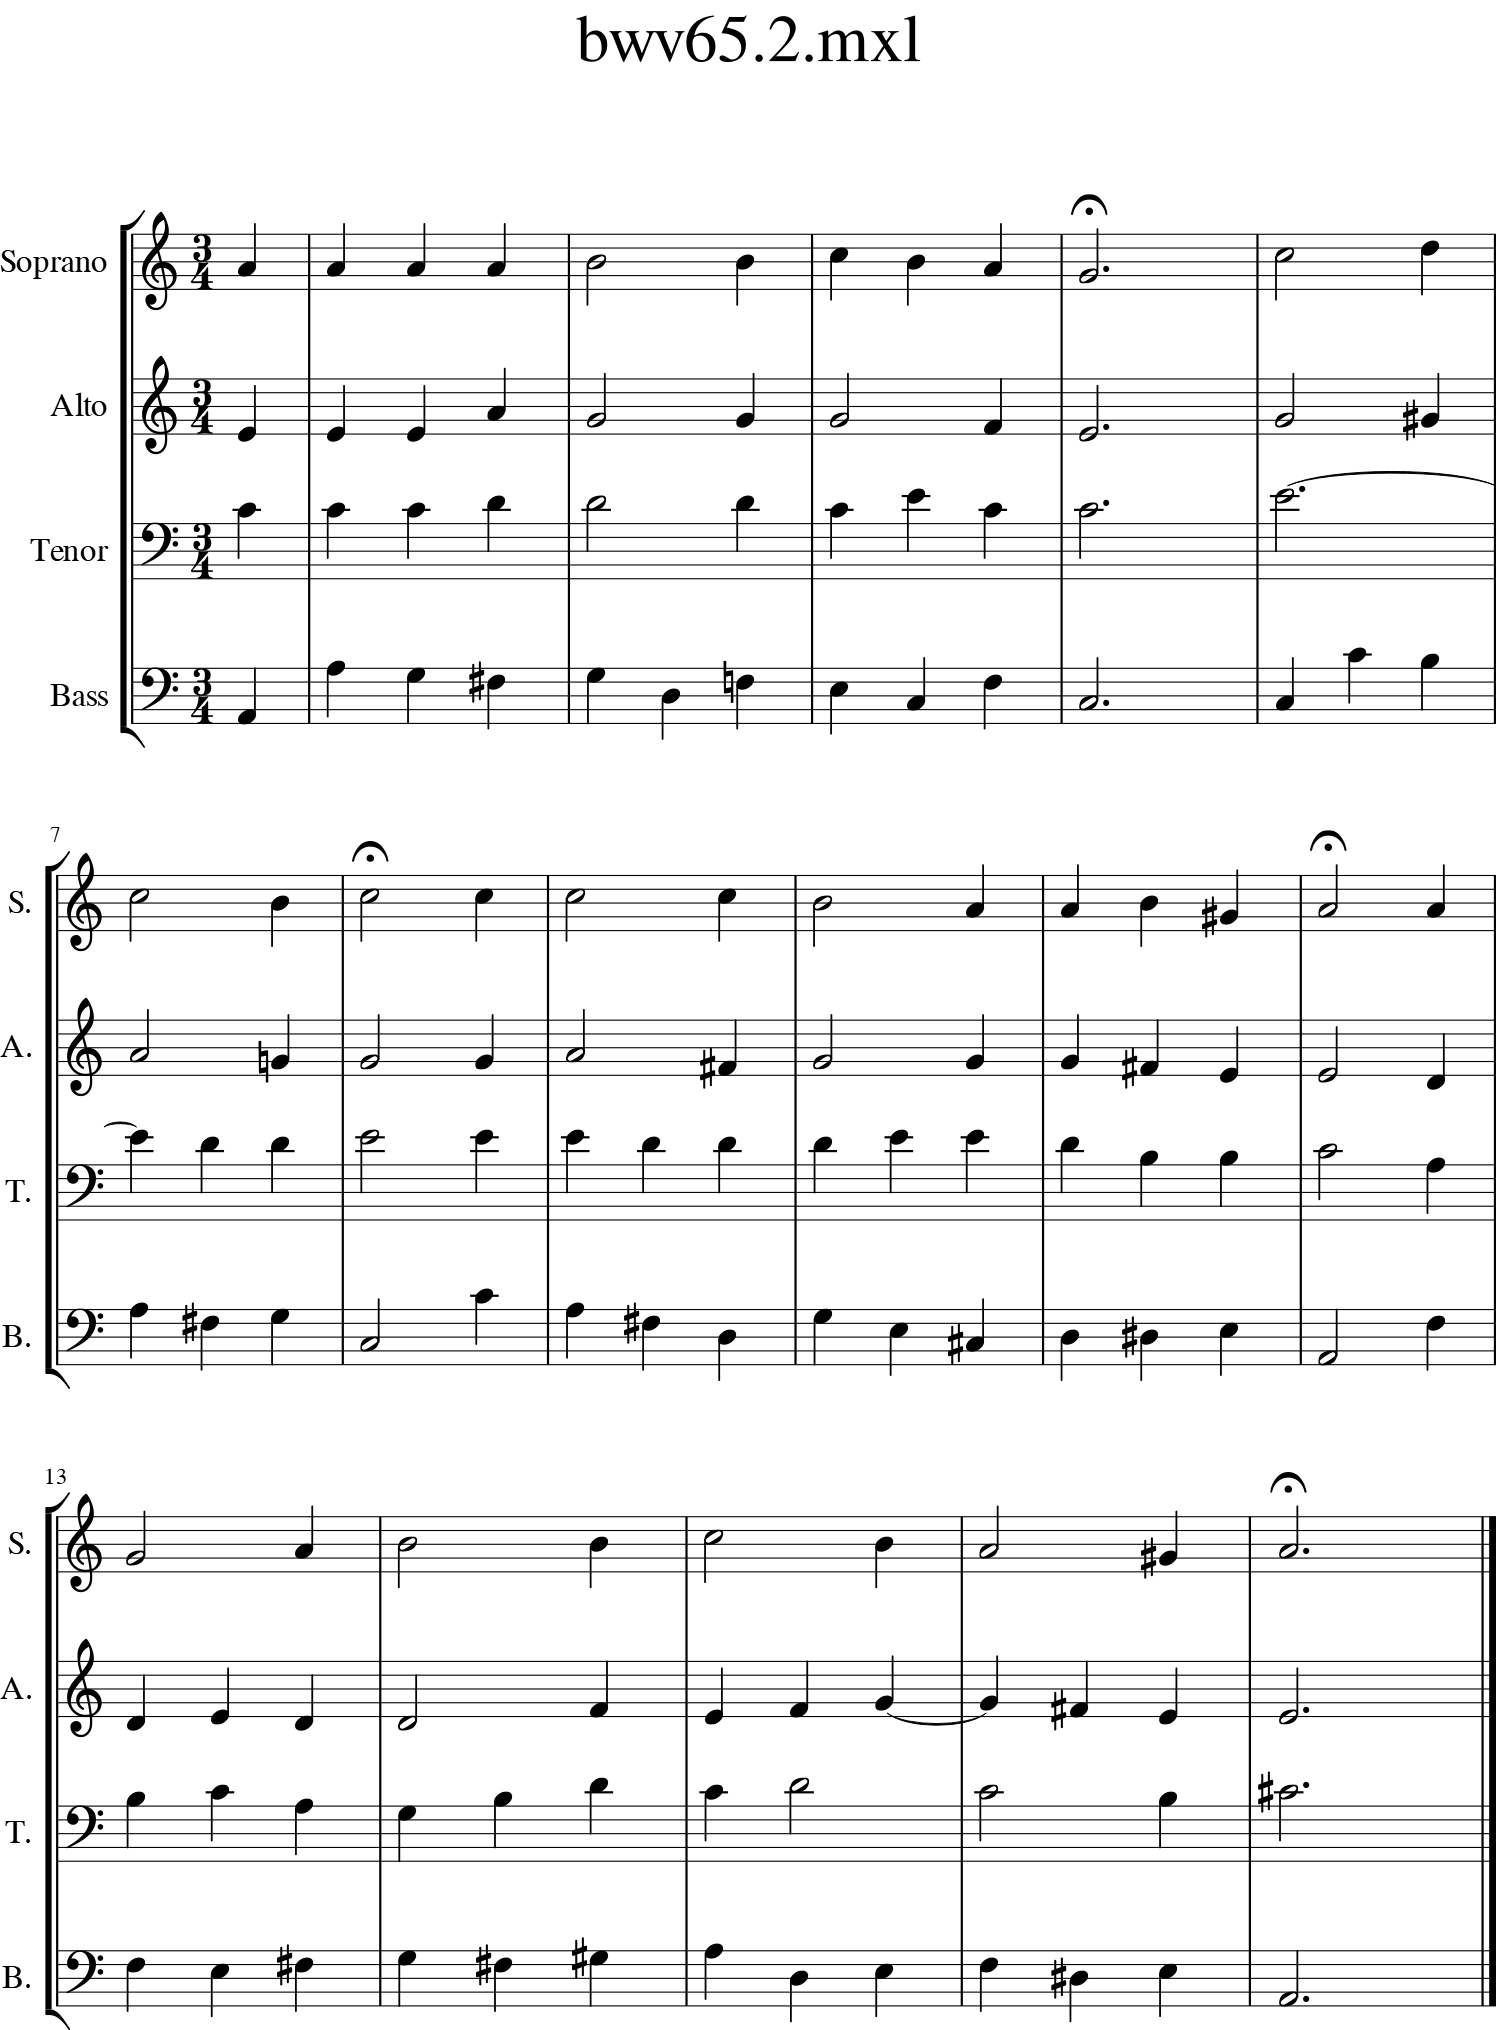

In [6]:
s = corpus.parse('bach/bwv65.2.xml')
s.show()

### Score manipulation

With music21 it is pretty straightforward to manipulate different parts/voices of a score. In the following example, we take the four voice chorale setting from above and transform it into a two-part piano setting.

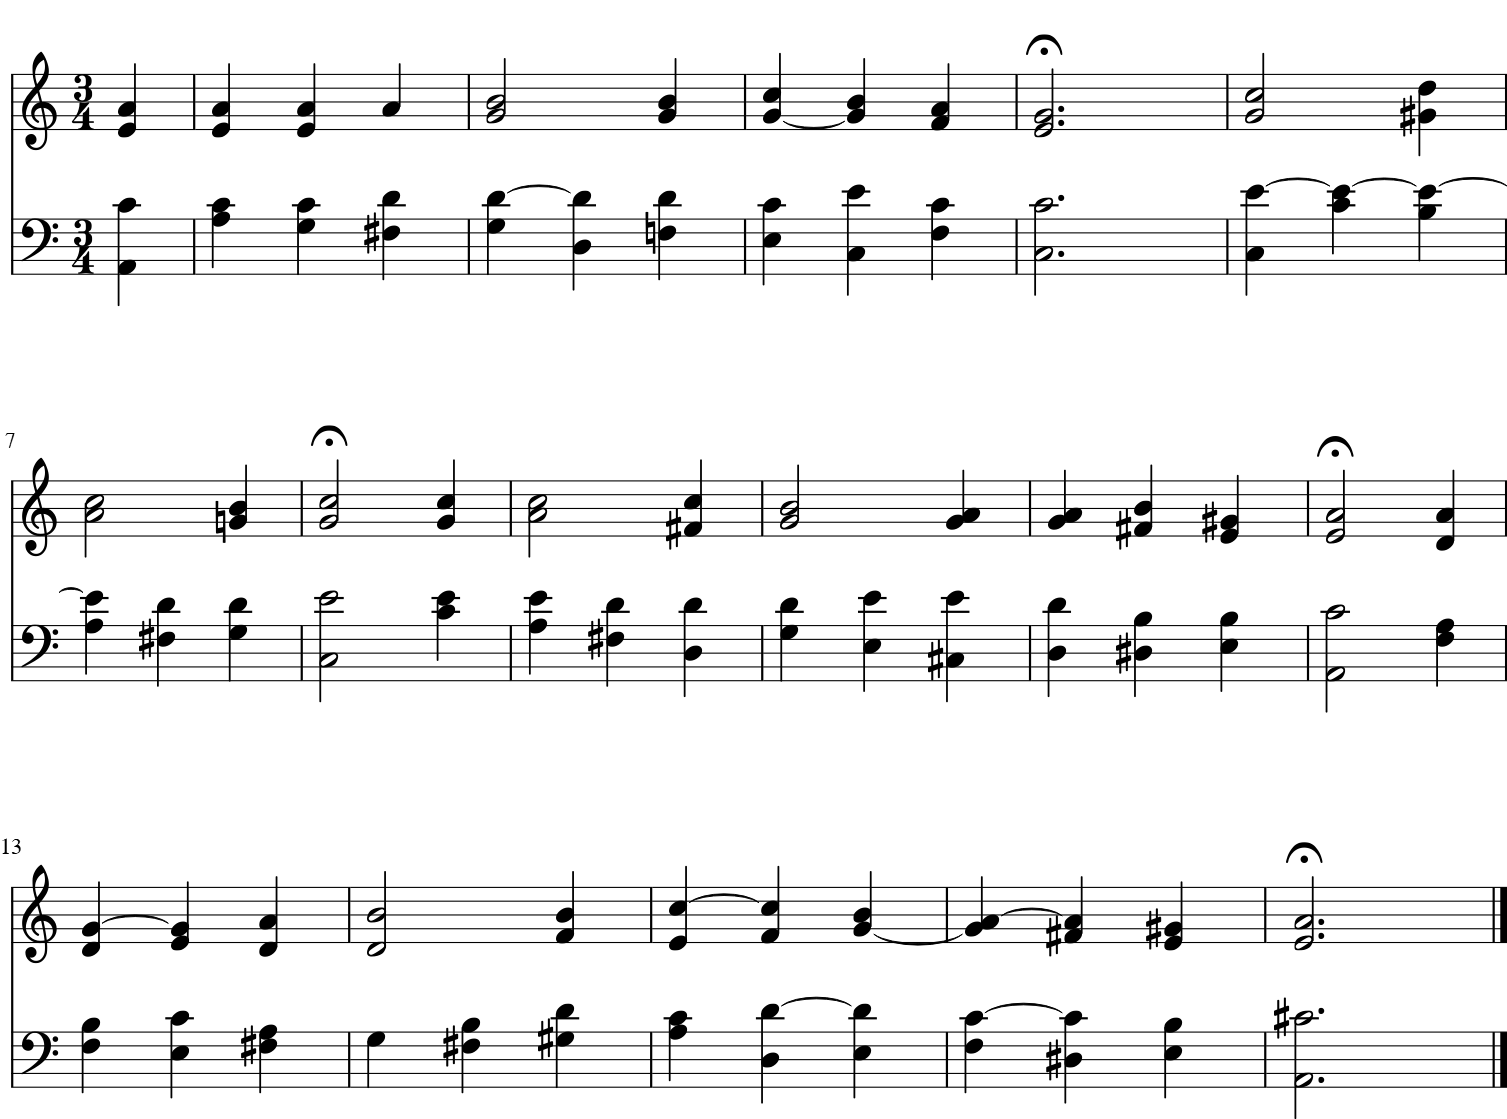

In [7]:
fVoices = stream.Score((s.parts['Soprano'], s.parts['Alto'])).chordify()
mVoices = stream.Score((s.parts['Tenor'], s.parts['Bass'])).chordify()

chorale2p = stream.Score((fVoices, mVoices))
chorale2p.show()

Or what about a more bass-with-accompaniment-style setting?

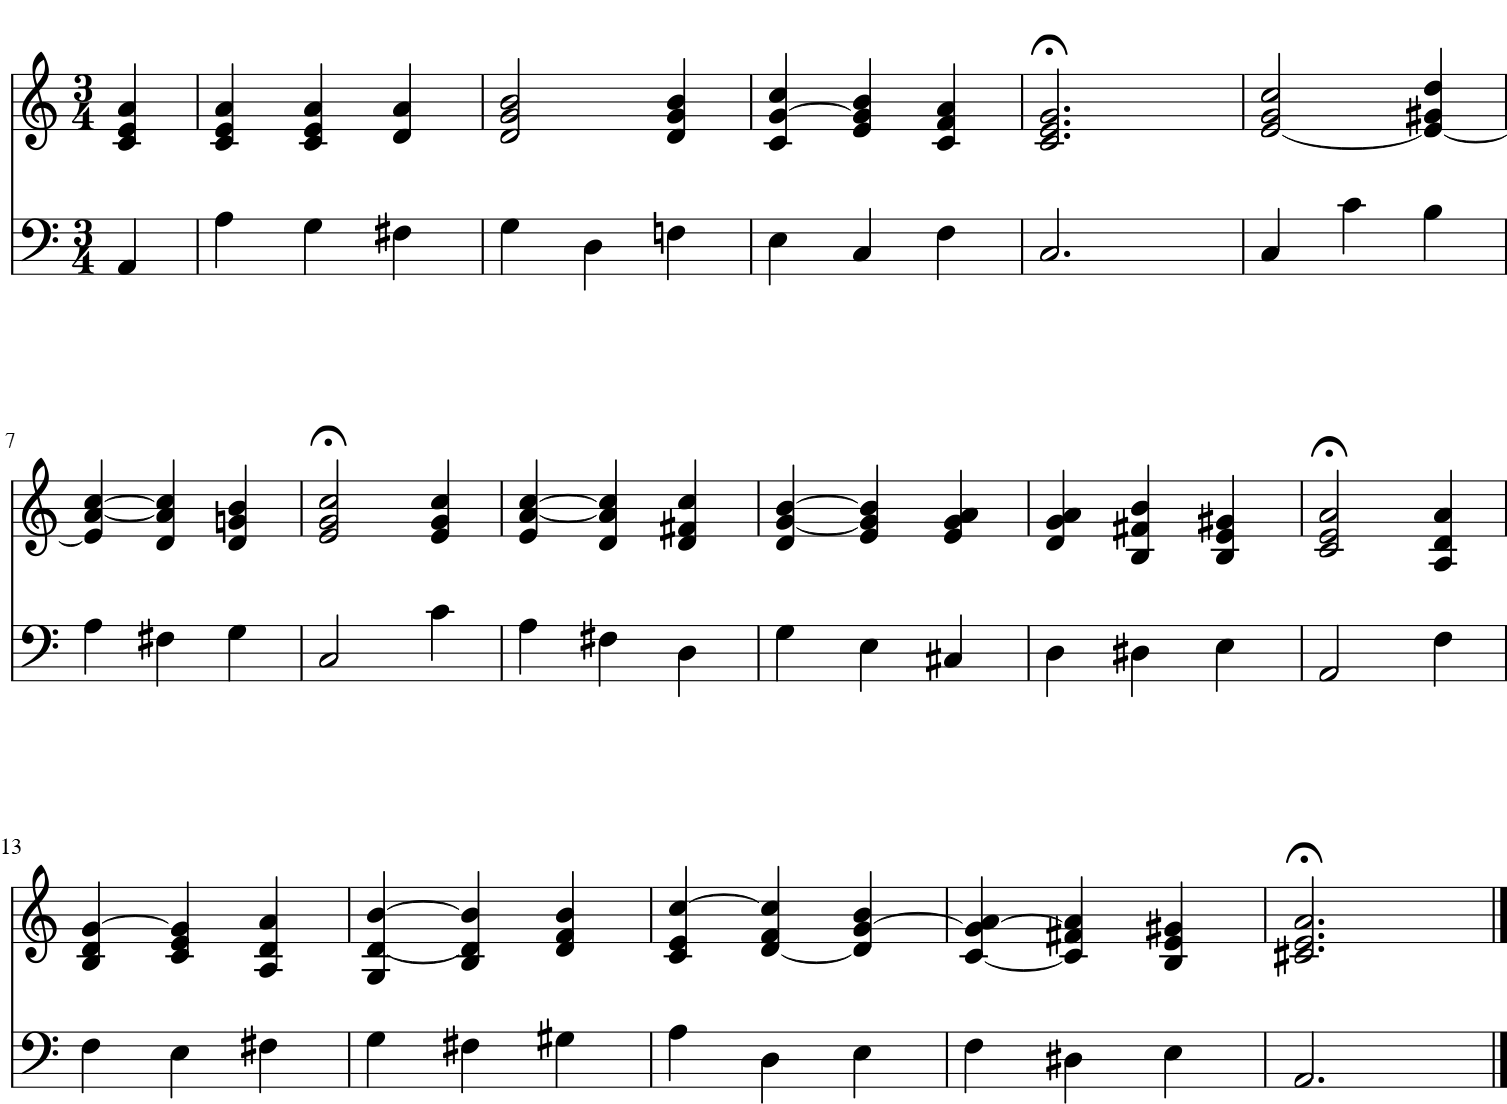

In [8]:
upperVoices = stream.Score((s.parts['Soprano'], s.parts['Alto'], s.parts['Tenor'])).chordify()
bass = stream.Score((s.parts['Bass']))

chorale3p = stream.Score((upperVoices, bass))
chorale3p.show()


To see, how music21 stores this stream internally, use the .`show()`-method:

In [9]:
chorale3p.show('text')

{0.0} <music21.stream.Part Soprano>
    {0.0} <music21.stream.Measure 0 offset=0.0>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.key.Key of C major>
        {0.0} <music21.meter.TimeSignature 3/4>
        {0.0} <music21.chord.Chord A4 E4 C4>
    {1.0} <music21.stream.Measure 1 offset=1.0>
        {0.0} <music21.chord.Chord A4 E4 C4>
        {1.0} <music21.chord.Chord A4 E4 C4>
        {2.0} <music21.chord.Chord A4 D4>
    {4.0} <music21.stream.Measure 2 offset=4.0>
        {0.0} <music21.chord.Chord B4 G4 D4>
        {2.0} <music21.chord.Chord B4 G4 D4>
    {7.0} <music21.stream.Measure 3 offset=7.0>
        {0.0} <music21.chord.Chord C5 G4 C4>
        {1.0} <music21.chord.Chord B4 G4 E4>
        {2.0} <music21.chord.Chord A4 F4 C4>
    {10.0} <music21.stream.Measure 4 offset=10.0>
        {0.0} <music21.chord.Chord G4 E4 C4>
    {13.0} <music21.stream.Measure 5 offset=13.0>
        {0.0} <music21.chord.Chord C5 G4 E4>
        {2.0} <music21.chord.Chord D5 G#4 E4>
   

In [10]:
for c in chorale3p.recurse().getElementsByClass('Chord'):
    print(c)

<music21.chord.Chord A4 E4 C4>
<music21.chord.Chord A4 E4 C4>
<music21.chord.Chord A4 E4 C4>
<music21.chord.Chord A4 D4>
<music21.chord.Chord B4 G4 D4>
<music21.chord.Chord B4 G4 D4>
<music21.chord.Chord C5 G4 C4>
<music21.chord.Chord B4 G4 E4>
<music21.chord.Chord A4 F4 C4>
<music21.chord.Chord G4 E4 C4>
<music21.chord.Chord C5 G4 E4>
<music21.chord.Chord D5 G#4 E4>
<music21.chord.Chord C5 A4 E4>
<music21.chord.Chord C5 A4 D4>
<music21.chord.Chord B4 G4 D4>
<music21.chord.Chord C5 G4 E4>
<music21.chord.Chord C5 G4 E4>
<music21.chord.Chord C5 A4 E4>
<music21.chord.Chord C5 A4 D4>
<music21.chord.Chord C5 F#4 D4>
<music21.chord.Chord B4 G4 D4>
<music21.chord.Chord B4 G4 E4>
<music21.chord.Chord A4 G4 E4>
<music21.chord.Chord A4 G4 D4>
<music21.chord.Chord B4 F#4 B3>
<music21.chord.Chord G#4 E4 B3>
<music21.chord.Chord A4 E4 C4>
<music21.chord.Chord A4 D4 A3>
<music21.chord.Chord G4 D4 B3>
<music21.chord.Chord G4 E4 C4>
<music21.chord.Chord A4 D4 A3>
<music21.chord.Chord B4 D4 G3>
<music2

### Roman numeral analysis

music21 makes it easy to apply roman numeral analysis to chordified music. To do so, we use the `.chordify()`-method on the chorale above, grep all chords with the `getElementsByClass()`-method, bring them into closed position and apply the roman numeral as lyrics. Additionally we highlight some seventh chords:

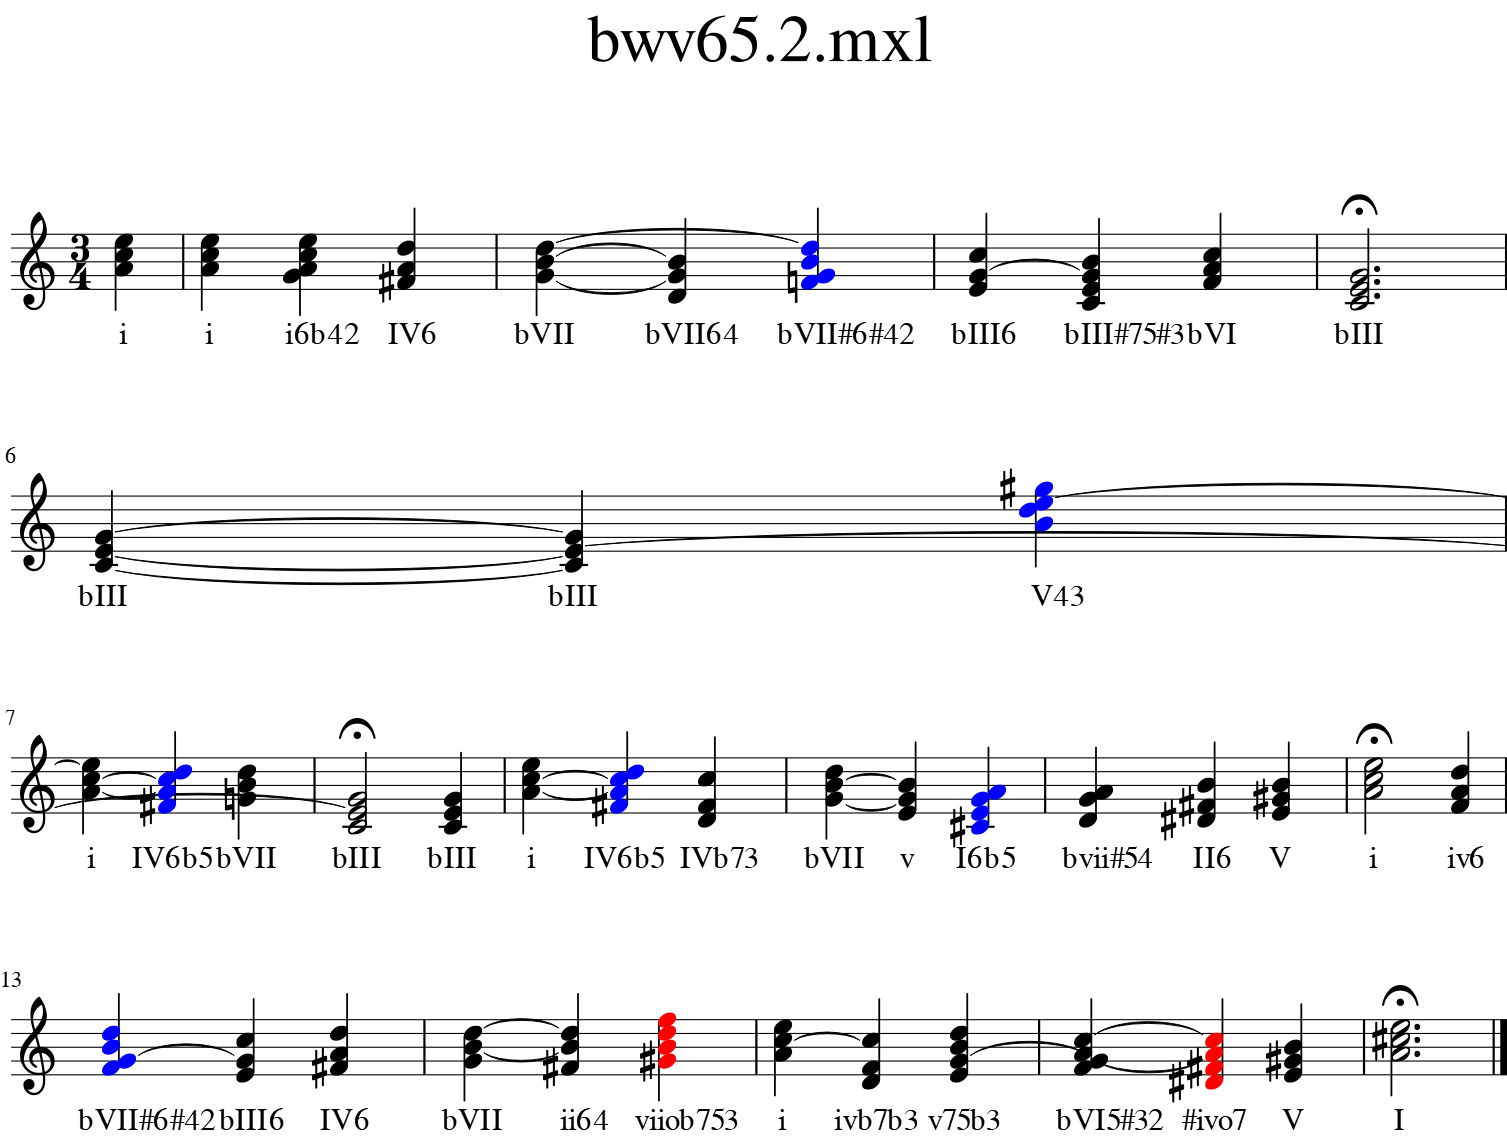

In [11]:
# chordify the chorale
choraleChords = chorale3p.chordify()

for c in choraleChords.recurse().getElementsByClass('Chord'):
    # force closed position
    c.closedPosition(forceOctave=4, inPlace=True)
    
    # apply roman numerals
    rn = roman.romanNumeralFromChord(c, key.Key('A'))
    c.addLyric(str(rn.figure))
    
    # highlight dimished seventh chords
    if c.isDiminishedSeventh():
        c.style.color = 'red'
    
    # highlight dominant seventh chords
    if c.isDominantSeventh():
        c.style.color = 'blue'

choraleChords.show()

## Another example (plotting)

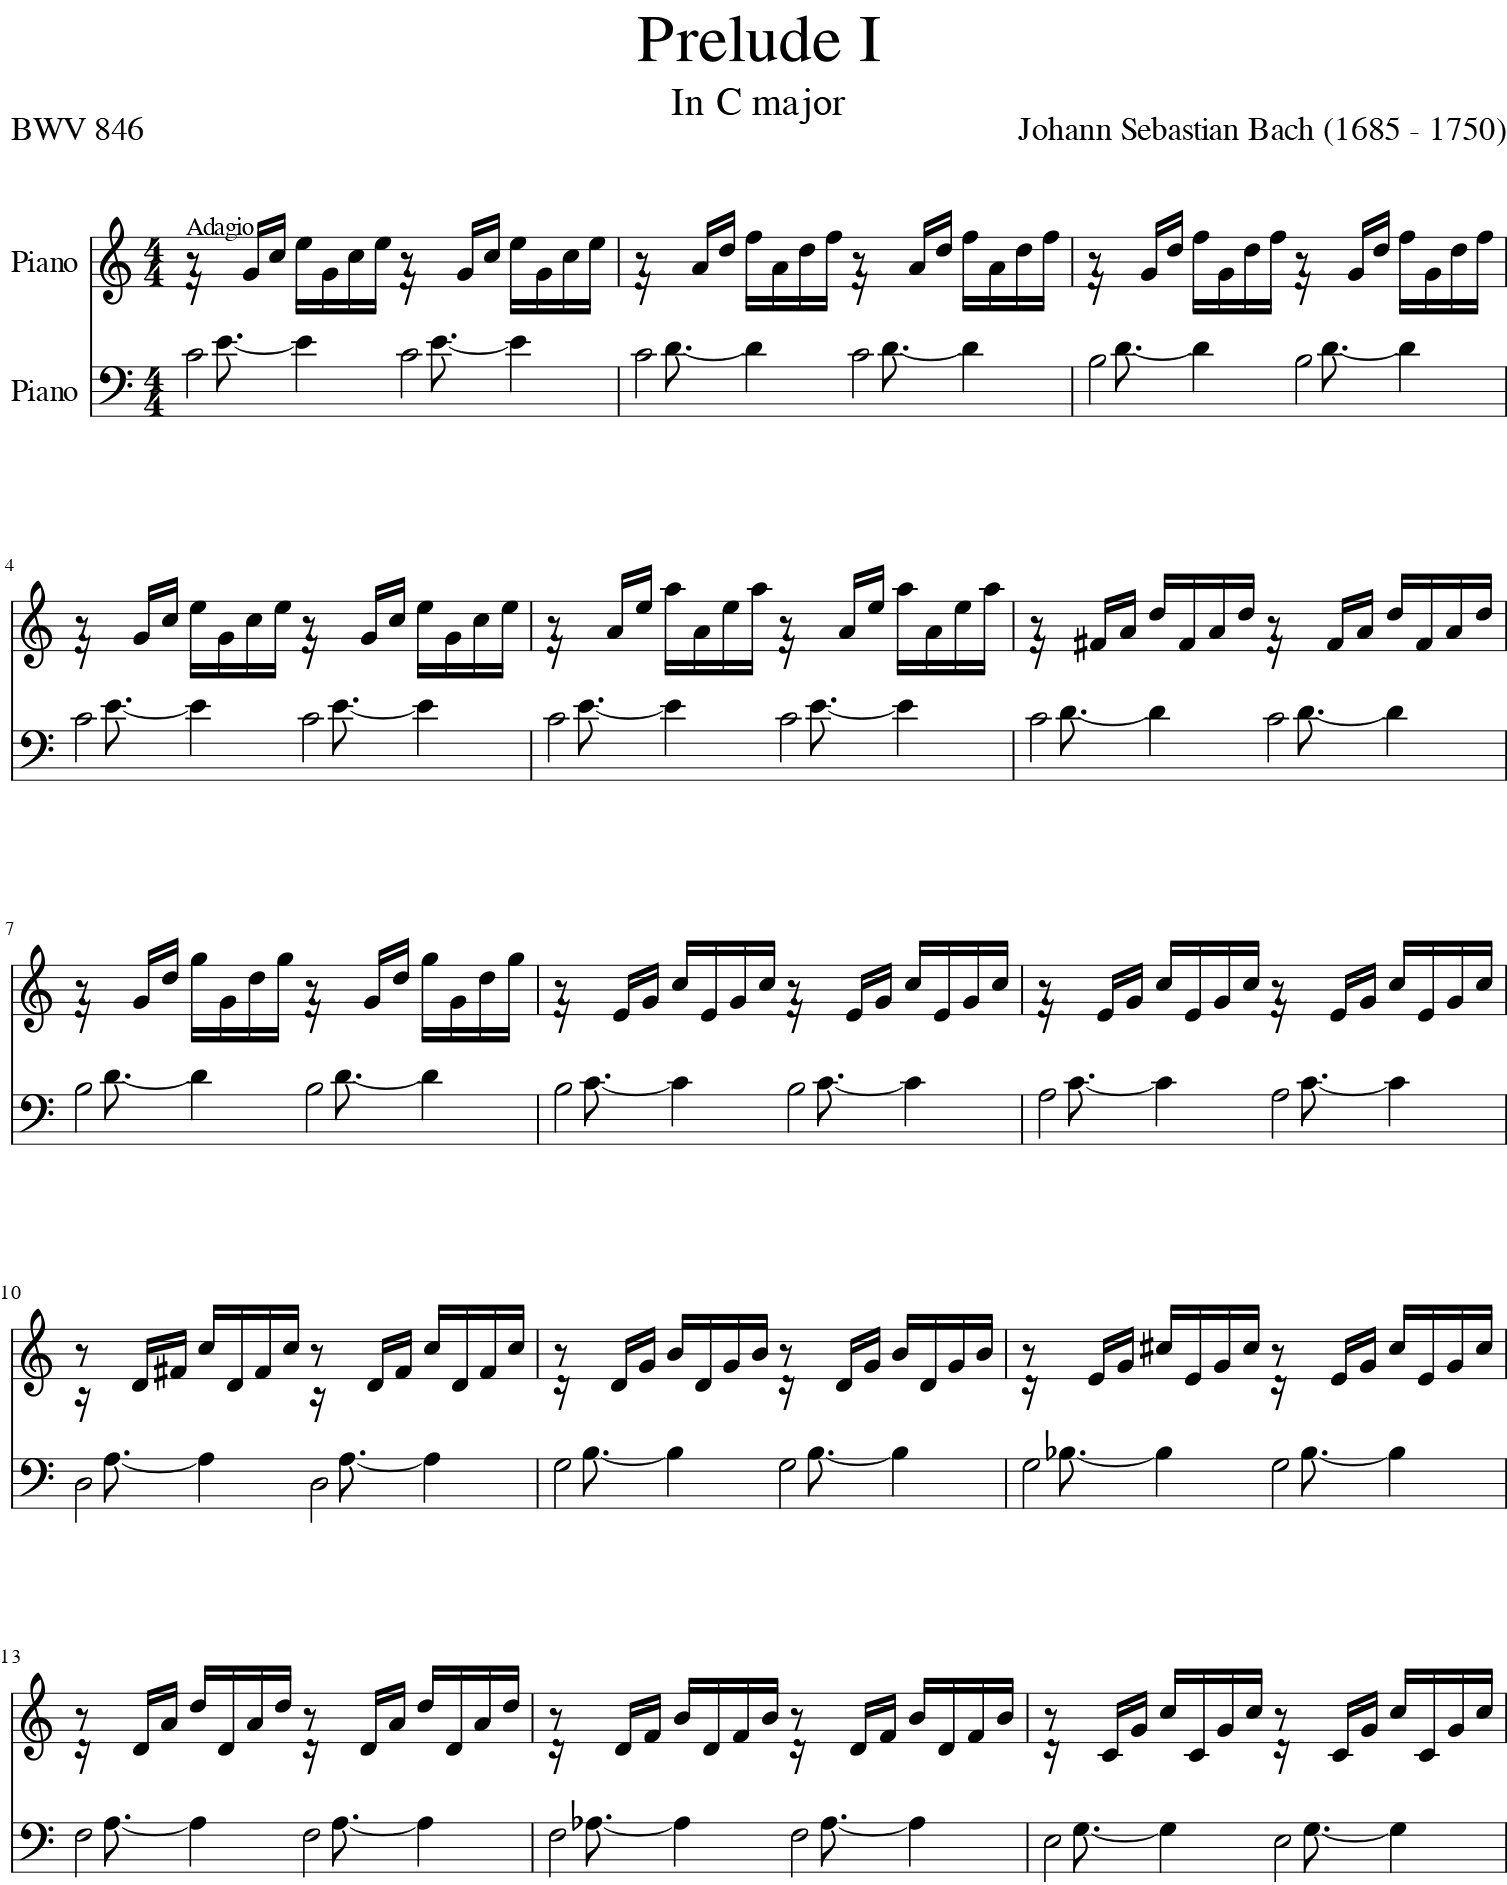

In [12]:
p = corpus.parse('bach/bwv846.xml')
p.show()

In [13]:
p.analyze('key')

<music21.key.Key of C major>

In [14]:
p.show('text')

{0.0} <music21.text.TextBox "Prelude I">
{0.0} <music21.text.TextBox "In C major">
{0.0} <music21.text.TextBox "Johann Seb...">
{0.0} <music21.text.TextBox "BWV 846">
{0.0} <music21.metadata.Metadata object at 0x0D0C3BD0>
{0.0} <music21.stream.PartStaff P1-Staff1>
    {0.0} <music21.instrument.Instrument P1: Piano: Piano>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.expressions.TextExpression "Adagio">
        {0.0} <music21.layout.SystemLayout>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.key.Key of C major>
        {0.0} <music21.meter.TimeSignature 4/4>
        {0.0} <music21.note.Rest rest>
        {0.5} <music21.note.Note G>
        {0.75} <music21.note.Note C>
        {1.0} <music21.note.Note E>
        {1.25} <music21.note.Note G>
        {1.5} <music21.note.Note C>
        {1.75} <music21.note.Note E>
        {2.0} <music21.note.Rest rest>
        {2.5} <music21.note.Note G>
        {2.75} <music21.note.Note C>
        {3.0} <music21.

In [15]:
len(p.parts)

2

In [16]:
len(p.flat.notes)

598

There are some plotting possibilities that come with `matplotlib`:

In [17]:
graph.findPlot.FORMATS

['horizontalbar',
 'histogram',
 'scatter',
 'scatterweighted',
 '3dbars',
 'colorgrid',
 'horizontalbarweighted']

To plot a stream, just use the `.plot()`-method instead of `-show()`:

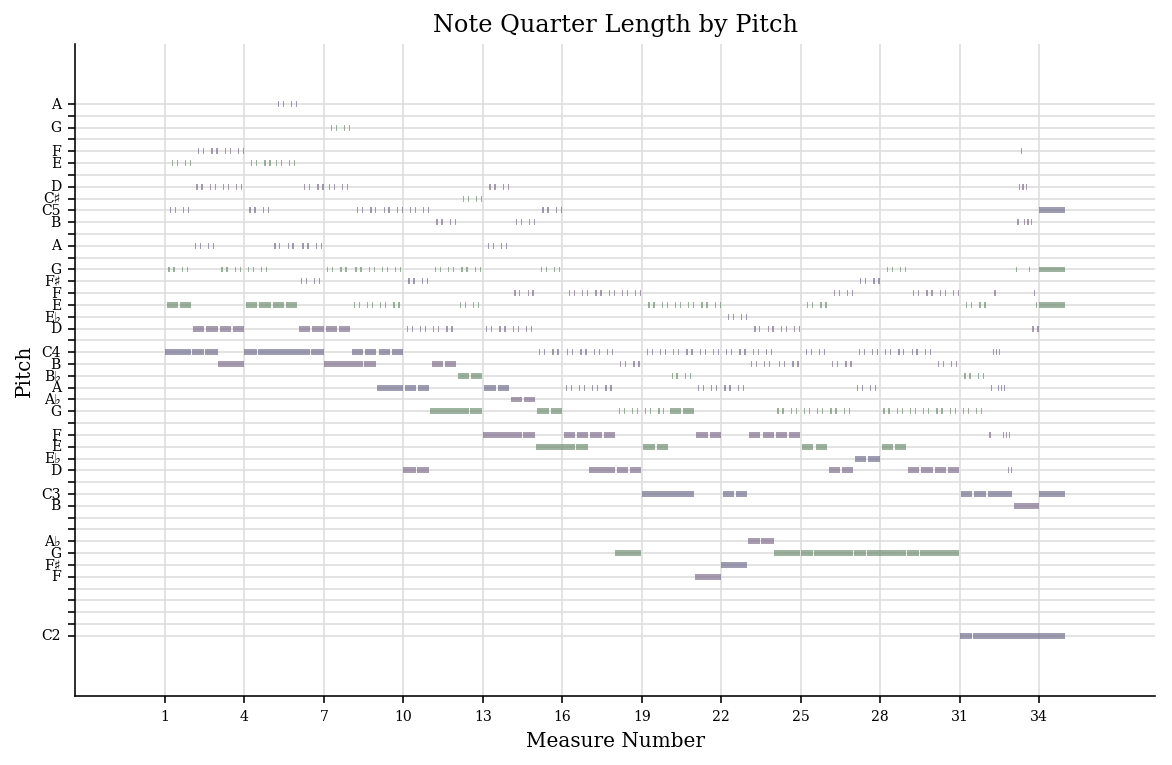

In [18]:
p.plot('pianoroll')

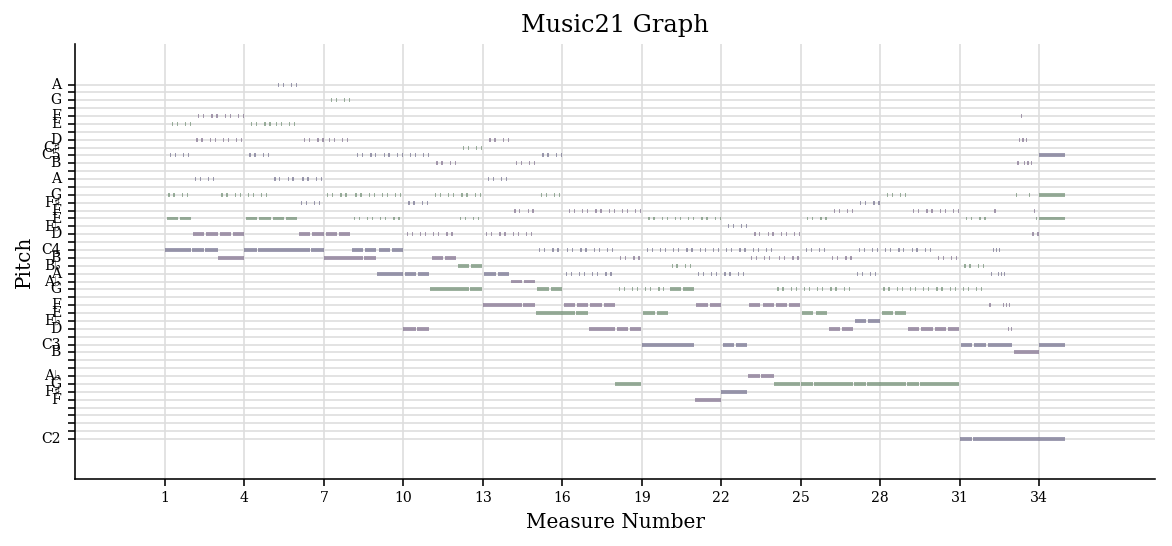

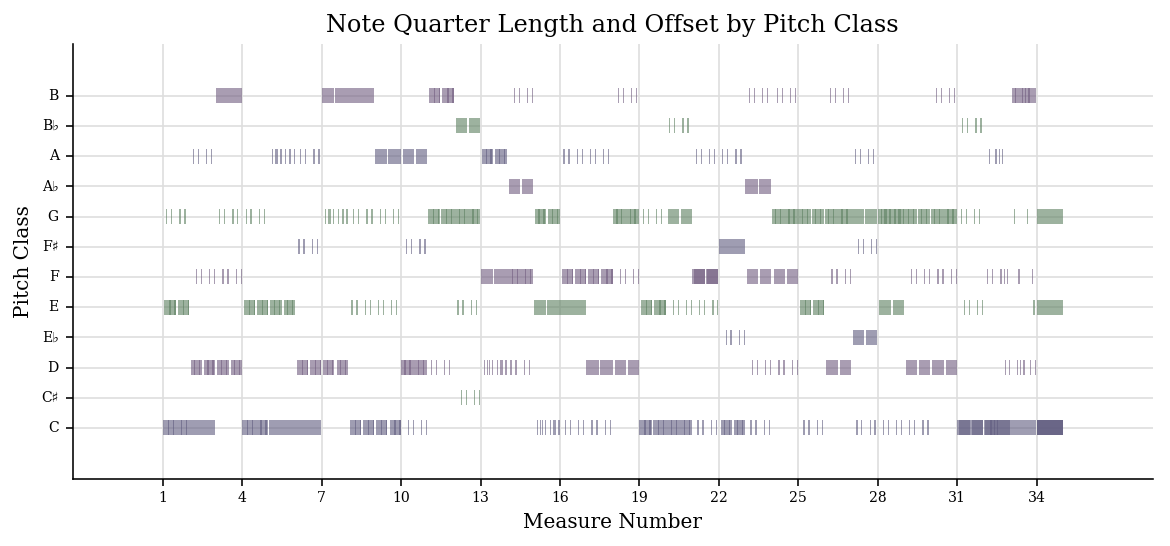

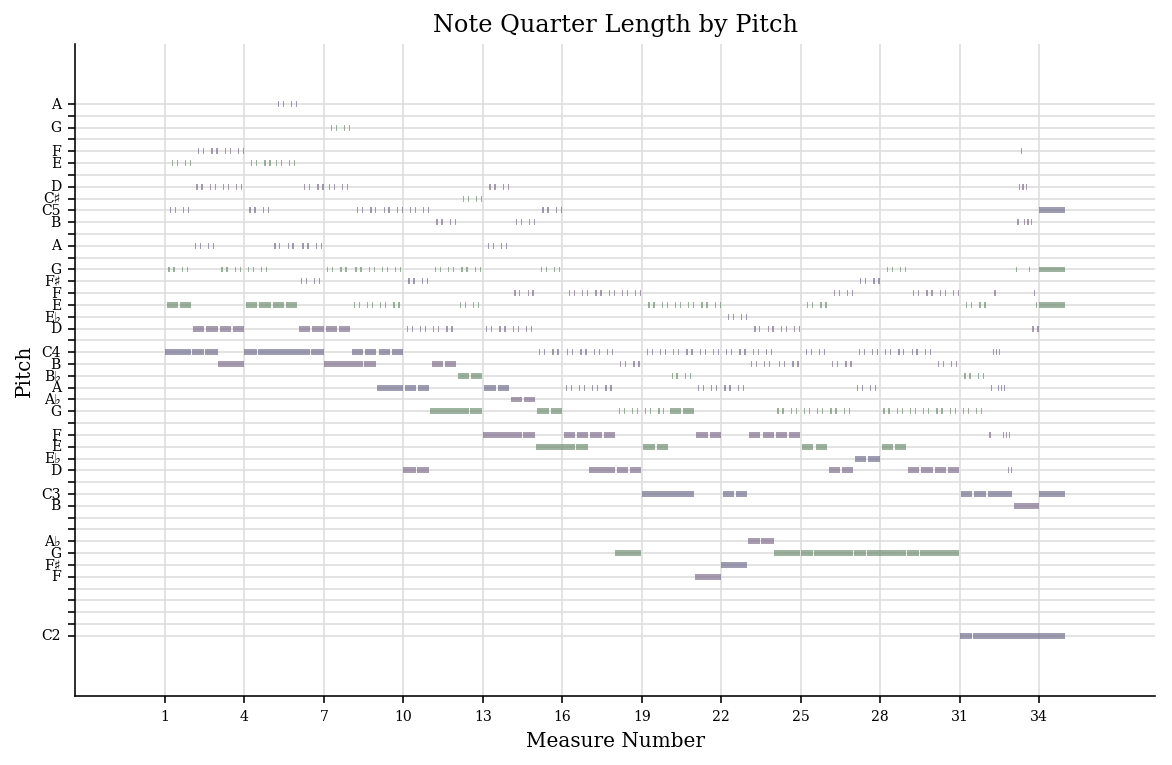

In [19]:
p.plot('horizontalbar')